# **TUGAS BESAR BIOINFORMATIKA**

## **Klasifikasi Bioaktivitas Fibroblast Growth Factor Receptor (FGFR) Menggunakan Metode Lazy Classifier dan Random Forest**

## **Model Classifier FGFR**
**Kelompok 6**

- Veni Zahara Kartika
- Khairunnisa Rifda Aulia
- Rahmi Agustin, Alayka Nazwa
- Rizka Yustiana Zahra
- Sylviani Prima Astuti Ananda

## **01 Model**

### **1.1 Import Library**

In [ ]:
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
import pickle, os

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### **1.2 Data Preprocess**

In [ ]:
df = pd.read_csv('/content/02_dataset_model_FGFR.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class,class_numeric
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,7.74,381.39,2.17,1.00,7.00,active,0
2,1,1,0,1,1,1,0,0,1,0,...,0,1,0,6.68,394.44,2.09,1.00,7.00,active,0
3,1,1,1,1,1,1,1,1,1,0,...,0,1,0,8.31,420.47,3.59,3.00,5.00,active,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,7.12,444.32,4.76,2.00,6.00,active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,0,0,1,1,1,0,0,1,1,...,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive,1
5242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive,1
5243,1,1,0,1,1,1,1,1,0,0,...,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive,1
5244,1,0,0,1,1,1,0,0,0,1,...,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive,1


In [ ]:
df = df.drop(columns=["class","pIC50"])
df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,MW,LogP,NumHDonors,NumHAcceptors,class_numeric
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,630.63,5.97,5.00,6.00,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,381.39,2.17,1.00,7.00,0
2,1,1,0,1,1,1,0,0,1,0,...,0,1,0,1,0,394.44,2.09,1.00,7.00,0
3,1,1,1,1,1,1,1,1,1,0,...,1,0,0,1,0,420.47,3.59,3.00,5.00,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,444.32,4.76,2.00,6.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,0,0,1,1,1,0,0,1,1,...,1,0,0,0,0,473.58,2.48,3.00,8.00,1
5242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,280.33,2.29,1.00,5.00,1
5243,1,1,0,1,1,1,1,1,0,0,...,1,0,0,0,0,483.46,3.91,1.00,10.00,1
5244,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,443.51,2.75,2.00,8.00,1


In [ ]:
X = df.drop(columns='class_numeric')
y = df.class_numeric

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,630.63,5.97,5.00,6.00
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,381.39,2.17,1.00,7.00
2,1,1,0,1,1,1,0,0,1,0,...,1,0,1,0,1,0,394.44,2.09,1.00,7.00
3,1,1,1,1,1,1,1,1,1,0,...,0,1,0,0,1,0,420.47,3.59,3.00,5.00
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,444.32,4.76,2.00,6.00


In [ ]:
y.head()

,class_numeric
0,1
1,0
2,0
3,0
4,0


### **1.3 Model Using Lazy Classifier**

In [ ]:
# Menghapus Fitur dengan Variansi Rendah
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4196, 159) (1050, 159) (4196,) (1050,)


In [ ]:
# Lazyclassifier
lazyc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = lazyc.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = lazyc.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 31/32 [00:30<00:00,  1.94it/s]

[LightGBM] [Info] Number of positive: 1316, number of negative: 2880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 4196, number of used features: 159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313632 -> initscore=-0.783193
[LightGBM] [Info] Start training from score -0.783193


100%|██████████| 32/32 [00:30<00:00,  1.04it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [00:13<00:00,  3.59it/s]

[LightGBM] [Info] Number of positive: 1316, number of negative: 2880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 4196, number of used features: 159
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313632 -> initscore=-0.783193
[LightGBM] [Info] Start training from score -0.783193


100%|██████████| 32/32 [00:13<00:00,  2.36it/s]


In [ ]:
#Train Result
print("\nTraining Results:")
print(models_train)


Training Results:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
BaggingClassifier                  0.99               0.99     0.99      0.99   
LGBMClassifier                     0.97               0.96     0.96      0.97   
SVC                                0.92               0.90     0.90      0.92   
KNeighborsClassifier               0.91               0.89     0.89      0.91   
Quadratic

In [ ]:
# Test Result
print("\nTesting Results:")
print(models_test)


Testing Results:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.88     0.88      0.90   
ExtraTreesClassifier               0.89               0.87     0.87      0.89   
LGBMClassifier                     0.89               0.87     0.87      0.89   
KNeighborsClassifier               0.89               0.86     0.86      0.89   
BaggingClassifier                  0.89               0.86     0.86      0.89   
SVC                                0.88               0.85     0.85      0.88   
ExtraTreeClassifier                0.87               0.84     0.84      0.87   
DecisionTreeClassifier             0.85               0.83     0.83      0.85   
QuadraticDiscriminantAnalysis      0.85               0.83     0.83      0.85   
NuSVC                              0.86               0.82     0.82      0.86   
LabelSprea

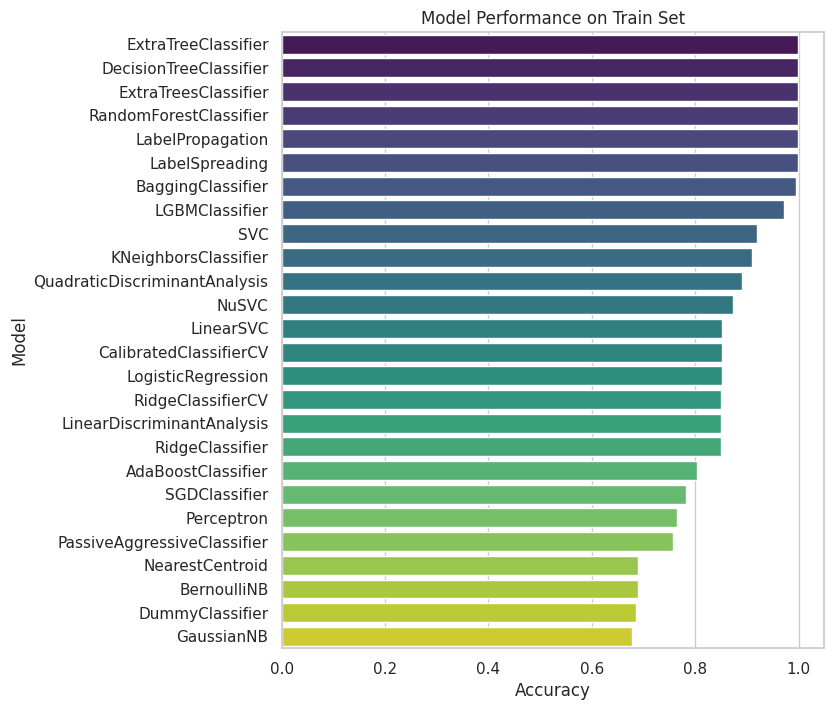

In [ ]:
# Sort models_train DataFrame by Accuracy in descending order
models_train_sorted = models_train.sort_values(by="Accuracy", ascending=False)

# Visualisasi Hasil Accuracy untuk Train
plt.figure(figsize=(7, 8))
sns.barplot(y=models_train_sorted.index, x="Accuracy", data=models_train_sorted, palette="viridis")
plt.title("Model Performance on Train Set")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

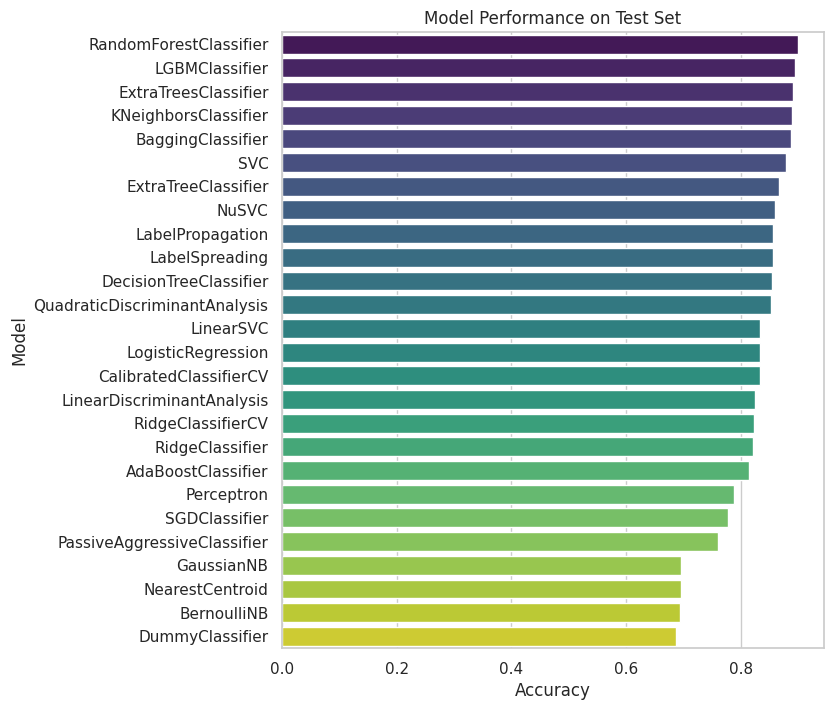

In [ ]:
# Sort models_train DataFrame by Accuracy in descending order
models_test_sorted = models_test.sort_values(by="Accuracy", ascending=False)

# Visualisasi Hasil Accuracy untuk Train
plt.figure(figsize=(7, 8))
sns.barplot(y=models_test_sorted.index, x="Accuracy", data=models_test_sorted, palette="viridis")
plt.title("Model Performance on Test Set")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

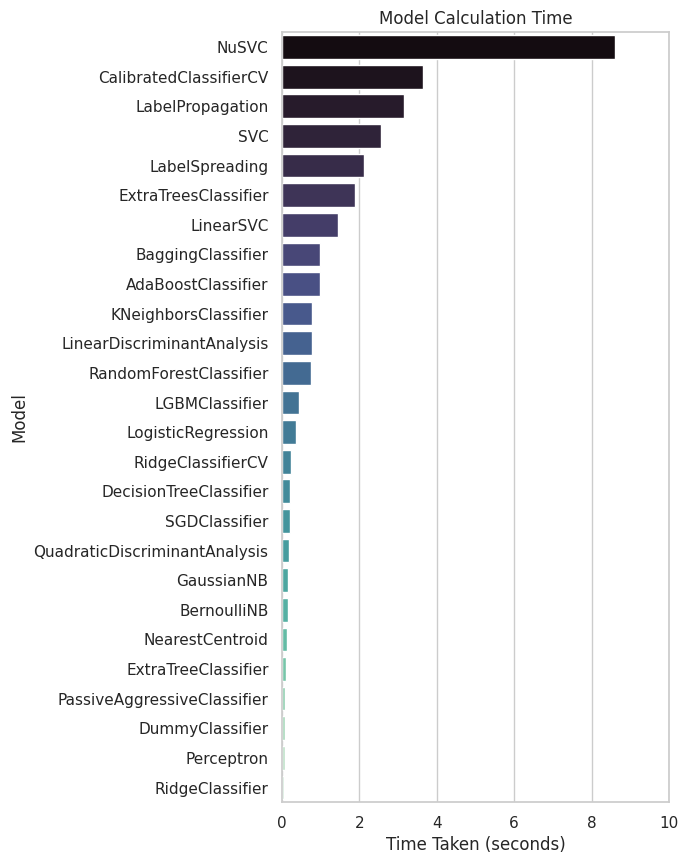

In [ ]:
# Bar plot of calculation time
models_train_sorted = models_train.sort_values(by="Time Taken", ascending=False)

# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train_sorted.index, x="Time Taken", data=models_train_sorted, palette="mako")
ax.set(xlim=(0, 10))
plt.title("Model Calculation Time")
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Model")
plt.show()

### **1.4 Model Random Forest Classifier**

In [ ]:
# Split Data
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, y_train.shape, y_test.shape, y_test.shape

((4196, 159), (4196,), (1050,), (1050,))

In [ ]:
# Model
model = RandomForestClassifier(n_estimators=100, random_state=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
# Evaluasi Train
accuracy = model.score(X_train, y_train)
print(f"Accuracy Train: {accuracy}")

Accuracy Train: 0.9997616777883699


In [ ]:
# Evaluasi Test
accuracy = model.score(X_test, y_test)
print(f"Accuracy Test: {accuracy}")

Accuracy Test: 0.900952380952381


In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       721
           1       0.85      0.82      0.84       329

    accuracy                           0.90      1050
   macro avg       0.89      0.88      0.88      1050
weighted avg       0.90      0.90      0.90      1050



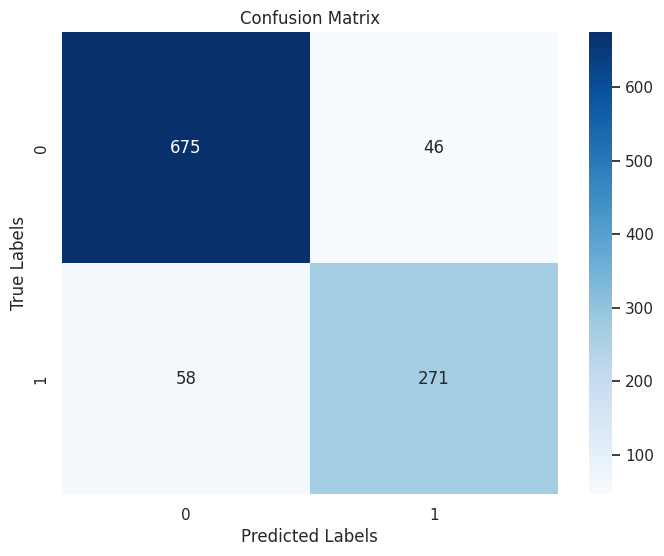

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### **1.5 Model Random Forest Classifier With Pipeline and Grid Search CV**

In [ ]:
# Dataset splitting
X = df.drop(columns='class_numeric')
y = df['class_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4196, 159), (1050, 159), (4196,), (1050,))

In [ ]:
# Preprocessor
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
categoric = [col for col in X_train.columns if col not in numeric]

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numeric),
    ("categoric", categorical_pipeline, categoric)
])

In [ ]:
# Pipeline
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(random_state=100))
])

In [ ]:
# Parameter tuning
parameter = {
    "algo__n_estimators": [100, 200, 300],
    "algo__max_depth": [None, 10, 20, 30],
    "algo__min_samples_split": [2, 5, 10],
    "algo__min_samples_leaf": [1, 2, 4]
}

model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['MW',
                                                                          'LogP',
                                                                          'NumHDonors',
                                                                          'NumHAcceptors']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_enco...
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                          '9',
                                                                          '10',
                                                                          '11',
                                                                          '12',
                                                                          '13',
                                                                          '14',
                                                                          '15',
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])])),
                                       ('algo',
                                        RandomForestClassifier(random_state=100))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 10, 20, 30],
                         'algo__min_samples_leaf': [1, 2, 4],
                         'algo__min_samples_split': [2, 5, 10],
                         'algo__n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
# Evaluation
print("Best Parameters:", model.best_params_)
print("Train Score:", model.score(X_train, y_train))
print("Best Cross-Validation Score:", model.best_score_)
print("Test Score:", model.score(X_test, y_test))

Best Parameters: {'algo__max_depth': None, 'algo__min_samples_leaf': 1, 'algo__min_samples_split': 2, 'algo__n_estimators': 300}
Train Score: 0.9997616777883699
Best Cross-Validation Score: 0.8991890112939176
Test Score: 0.8971428571428571


In [ ]:
# Predict
X_pred = X.iloc[0:1]
X_pred["class_numeric"] = model.predict(X_pred)
print(X_pred)

   0  1  2  3  4  5  6  7  8  9  ...  150  151  152  153  154     MW  LogP  \
0  1  1  0  0  0  0  0  0  0  1  ...    0    0    0    0    0 630.63  5.97   

   NumHDonors  NumHAcceptors  class_numeric  
0        5.00           6.00              1  

[1 rows x 160 columns]


In [ ]:
# Save model
os.makedirs("model_output", exist_ok=True)
pickle.dump(model, open("model_output/random_forest.pkl", "wb"))